In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.cm as cm
from itertools import combinations

from instances.parser import *

from math import atan, cos, sin, pi

from E3PNT.e3pnt import *

import time
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


<IPython.core.display.Javascript object>


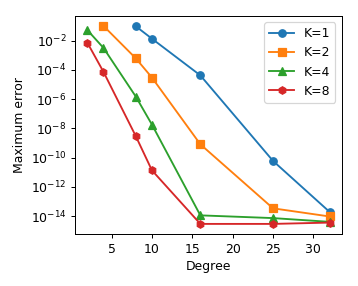

<IPython.core.display.Javascript object>


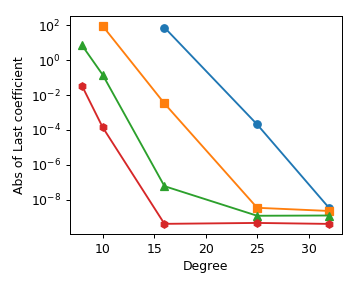

CPU times: user 2min 40s, sys: 14.7 ms, total: 2min 40s
Wall time: 2min 40s


In [39]:
%%time

I = parse_input('../instances/CM3.txt')
X=I.X
Y=I.Y
n = len(X)
m = len(I.a)

markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

error_info = dict()
degs = [2, 4, 8, 10, 16, 25, 32]

fig1, ax1 = plt.subplots(figsize=(4, 3.2))
ax1.set_yscale('log')

fig2, ax2 = plt.subplots(figsize=(4, 3.2))
ax2.set_yscale('log')

#fig4, ax4 = plt.subplots(figsize=(5, 4))
#ax4.set_yscale('log')

#fig3, ax3 = plt.subplots(figsize=(5, 4))

#for K in [1, 2, 4, 8]:
for K in [1, 2, 4, 8]:
    error_info = dict()
    error_ref = dict()
    error_coef = dict()
    rtime = dict()
    
    for deg in degs:
        error = []
        error2 = []
        error3 = []
        running_time = []
        
        change = 0
        nsols = 0
        for h in range(m):
            a = I.a[h]
            b = I.b[h]

        for i,j,k in combinations(range(n), 3):
            
            xs = [X[i], X[j], X[k]]
            ys = [Y[i], Y[j], Y[k]]

            cpols = get_cheb_poly(a, b, xs, ys, deg, K)

            t1 = time.time()

            for cpol in cpols:

                roots = cpol.roots()

                l = cpol.domain[0]
                r = cpol.domain[-1]

                roots = list(filter(lambda t, l=l, r=r: abs(t.imag) < 1e-9 and t.real - 1e-9 < r and t.real + 1e-9 > l, roots))

                roots = np.real(roots)

                if len(roots) == 0:
                    continue

                nsols += 1
                error3.append(cpol.coef[-1])

                for theta in roots:
                    xc, yc = get_center_from_angle(theta, a, b, xs, ys)
                    #print(xs)
                    #print(ys)
                    for jj in range(3):
                        error.append(abs(1 - eval_ellipse(theta, a, b, xc, yc, xs[jj], ys[jj])))

                for theta in roots:
                    thetab = theta
                    theta = refine_root(cpol, theta, 3)

                    change = max(change, thetab - theta)

                    xc, yc = get_center_from_angle(theta, a, b, xs, ys)
                    for jj in range(3):
                        error2.append(abs(1 - eval_ellipse(theta, a, b, xc, yc, xs[jj], ys[jj])))

            running_time.append(time.time() - t1)
                            
        if max(error) < 100:
            error_info[deg] = max(error)
            error_ref[deg] = max(error2)
        if max(error3) < 100:
            error_coef[deg] = max(error3)
            
        rtime[deg] = np.mean(running_time)
            
    ax1.plot(error_info.keys(), error_info.values(), markers[ccnt]+'-', label=f'K={K}', color=colors[ccnt])
   # ccnt+=1
    #ax1.plot(error_coef.keys(), error_coef.values(), markers[ccnt]+'-', label=f'LC, K={K}', color=colors[ccnt])
     
    ax2.plot(error_coef.keys(), error_coef.values(), markers[ccnt]+'-', label=f'K={K}', color=colors[ccnt])

    #ax3.plot(rtime.keys(), rtime.values(), markers[ccnt]+'-', label=f'K={K}', color=colors[ccnt])

    ccnt+=1
    #plt.savefig('a.jpg')

ax1.set_xlabel('Degree')
ax1.set_ylabel('Maximum error')
fig1.tight_layout()

ax2.set_xlabel('Degree')
ax2.set_ylabel('Abs of Last coefficient')
fig2.tight_layout()

plt.tight_layout()

#ax3.set_xlabel('Degree')
#ax3.set_ylabel('Running time in seconds')
#fig3.tight_layout()

ax1.legend()
#ax2.legend()
#ax3.legend()
#ax4.legend()
#plt.savefig('interpolant_error_after_newton.pdf')
#fig4.savefig('error_coef.pdf')
fig1.savefig('error_roots.pdf')
fig2.savefig('last_coeff.pdf')
plt.show()

In [3]:
%%time

I = parse_input('../instances/danft1.txt')
X=I.X
Y=I.Y
n = len(X)
m = len(I.a)


nsols = 0
error = []
K = 1
deg = 16

#X = [-1.33, 1.33, -0.1]
#Y = [0, 0, -1.82]
#n = len(X)

for h in range(1):
    a = 2.7
    b = 1

    # a=2.7, b=1; h=0.85; (-0.1, -1.72)


    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):

                xs = [X[i], X[j], X[k]]
                ys = [Y[i], Y[j], Y[k]]
                
                
                cpols = get_cheb_poly(a, b, xs, ys, deg, K)
                hsen = 0
                
                for cpol in cpols:
                    roots = cpol.roots()

                    l = cpol.domain[0]
                    r = cpol.domain[-1]

                    roots = list(filter(lambda t, l=l, r=r: abs(t.imag) < 1e-15 and t.real - 1e-15 < r and t.real + 1e-15 > l, roots))
                    roots = np.real(roots)

                    if len(roots) == 0:
                        continue
                    hsen += 1
                    csl = 0
                    if hsen == 1:
                        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
                        #ax.set_aspect('equal')
                        ax.scatter(xs, ys, color='black', lw=2)
                        #csl += 1
                        #ax.autoscale(tight=True)
                        
                    
                    for theta in roots:
                        xc, yc = get_center_from_angle(theta, a, b, xs, ys)
                        
                        
                        print(f"{theta}, ({xc}, {yc}) ->>>> {xs} ->>> {ys}")
                        
                        E=mp.patches.Ellipse([xc, yc], a * 2, b * 2, fill=False, angle=theta/pi * 180, color=colors[csl], lw=1.5, alpha=1)
                        csl+=1
                        ax.add_patch(E)
                        ax.autoscale(tight=True)
                
                if hsen == 0:
                    continue
                plt.tight_layout()
                #E=mp.patches.Ellipse([15, 38.1], a * 2, b * 2, fill=False, angle=4, color=colors[0], lw=1.5, alpha=0)
                #ax.add_patch(E)
                #ax.autoscale()

                plt.axis('off')
                #plt.savefig(f'ps/e3psol{i}{j}{k}.pdf', bbox_inches = 'tight', pad_inches = 0)
                plt.show()

                        



CPU times: user 62.9 ms, sys: 1.17 ms, total: 64.1 ms
Wall time: 403 ms
